# Categorical Data / US Income Data


### Questions
- How does *wage* depend on *age*?
- How does *wage* dependon *education*?

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

In [2]:
df = pd.read_csv('./data/wage.csv.gz', index_col=0)

In [3]:
df.head(3)

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177


In [4]:
df.columns

Index(['year', 'age', 'sex', 'maritl', 'race', 'education', 'region',
       'jobclass', 'health', 'health_ins', 'logwage', 'wage'],
      dtype='object')

#### wage ~ age

In [5]:
df[['wage', 'age']].describe()

,wage,age
count,3000.000000,3000.000000
mean,111.703608,42.414667
std,41.728595,11.542406
min,20.085537,18.000000
25%,85.383940,33.750000
50%,104.921507,42.000000
75%,128.680488,51.000000
max,318.342430,80.000000


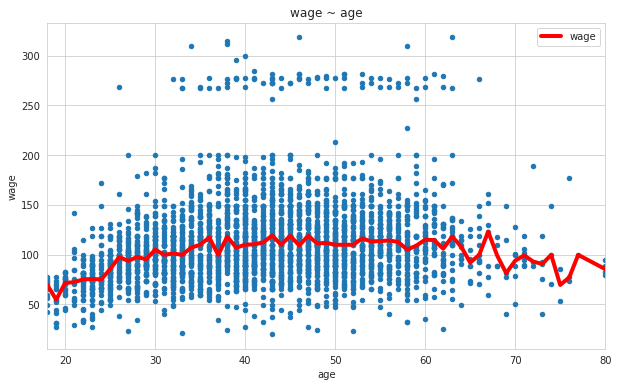

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))
df.plot.scatter(x='age', y='wage', title='wage ~ age', ax=ax)
median_wage = df.groupby('age')[['wage']].agg(np.median)
median_wage.plot.line(label='median', linewidth=4, color='r', ax=ax)
ax.legend()

#### wage ~ education

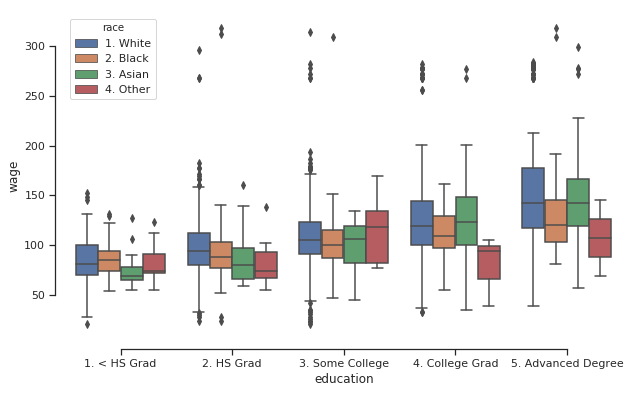

In [7]:
# what about race?
sns.set(style="ticks")
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(y='wage', x='education', hue='race',
            data=df, 
            order=sorted(df['education'].unique()), 
            hue_order=sorted(df['race'].unique()), 
            ax=ax)
sns.despine(offset=10, trim=True)

In [8]:
# export to Excel for later discussion...
df_res = df.groupby(['education', 'race'])[['wage']].agg(np.median)
df_res.to_excel('data/great_insight.xlsx')
df_res

wage
education          race                
1. < HS Grad       1. White   81.283253
                   2. Black   85.383940
                   3. Asian   68.748088
                   4. Other   73.775743
2. HS Grad         1. White   94.072715
                   2. Black   87.981033
                   3. Asian   79.854900
                   4. Other   73.775743
3. Some College    1. White  104.921507
                   2. Black   99.689464
                   3. Asian  105.903197
                   4. Other  118.015588
4. College Grad    1. White  118.884359
                   2. Black  109.354256
                   3. Asian  123.089700
                   4. Other   94.072715
5. Advanced Degree 1. White  141.775172
                   2. Black  119.740851
                   3. Asian  141.775172
                   4. Other  106.945844